# Pre-processing steps

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


Her bir ML modele uyqun olan pre processing stepleri icra olunur

In [79]:
pd.set_option('display.max_columns',90)

In [80]:
data = pd.read_csv(r'marketing.csv')

In [81]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [82]:
data.describe(include = 'all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [83]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

In [84]:
data['result'] = data['result'].map({'yes': 0, 'no': 1})

In [85]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,0
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,0
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,1
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,1


In [86]:
corr = data.corr()['result']

<ipython-input-86-63a0889f6376>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['result']


In [87]:
corr

ID         -0.002709
age        -0.039048
balance    -0.067328
day         0.046693
campaign    0.116400
pdays      -0.147103
previous   -0.157370
result      1.000000
Name: result, dtype: float64

In [58]:
data = data.drop([#'age',
                  #'day',
                  #'pdays',
                  #'previous',
                  ], axis = 1)

In [59]:
data

,ID,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,response,result
0,13829,technician,single,tertiary,no,18254,no,no,cellular,may,2,-1,0,unknown,1
1,22677,services,single,secondary,no,512,yes,yes,unknown,jun,3,-1,0,unknown,1
2,10541,management,single,secondary,no,135,no,no,cellular,aug,2,-1,0,unknown,1
3,13689,technician,married,unknown,no,30,yes,no,cellular,jul,1,-1,0,unknown,1
4,11304,admin.,single,secondary,no,321,no,yes,unknown,sep,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,technician,married,secondary,no,1167,yes,no,cellular,apr,1,87,5,failure,0
12866,17259,unknown,married,secondary,no,111,no,no,cellular,nov,2,93,2,failure,0
12867,15200,unemployed,single,tertiary,no,1316,yes,no,cellular,nov,1,172,2,failure,1
12868,13775,management,married,tertiary,no,479,yes,no,unknown,may,2,-1,0,unknown,1


In [91]:
vari = data[['balance',
             'campaign',
             #'pdays',
             #'previous',
             'age',
             'day']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vari.values,i) for i in range(vari.shape[1])]
vif['Features'] = vari.columns
vif

,VIF,Features
0,1.213538,balance
1,1.863598,campaign
2,4.028131,age
3,3.794649,day


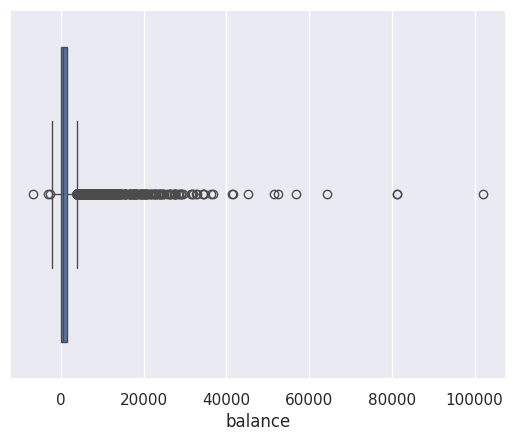

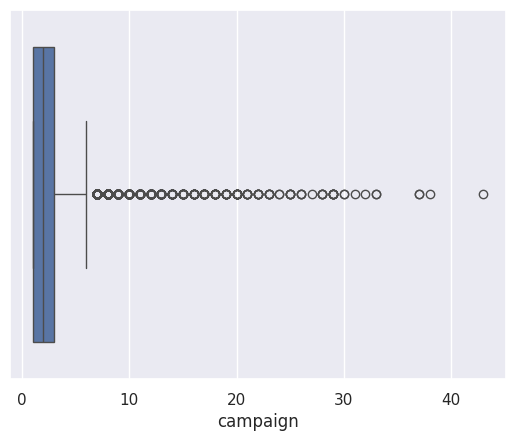

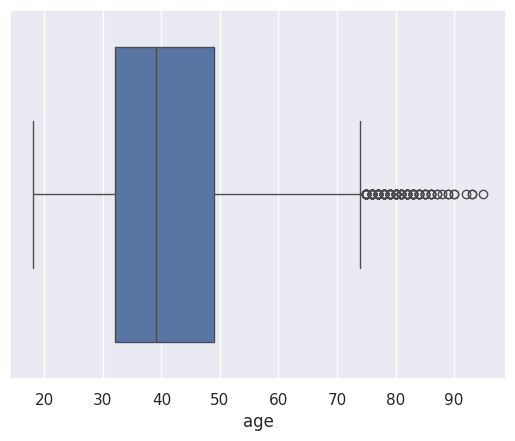

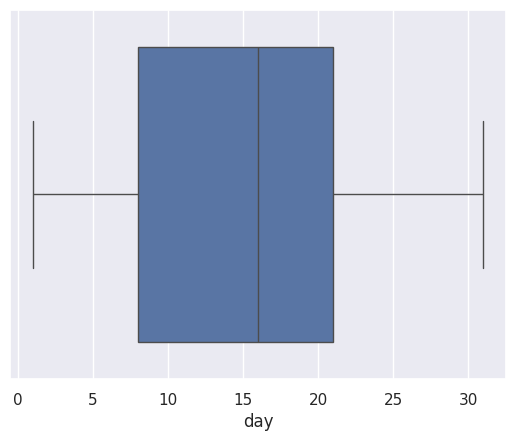

In [93]:
for i in data[['balance', 'campaign', 'age', 'day']]:
  sns.boxplot(data = data, x = data[i])
  plt.show()

In [94]:
data = data.drop(['pdays' , 'previous'], axis = 1)

In [61]:
data

,ID,job,marital,education,default,balance,housing,loan,contact,month,campaign,response,result
0,13829,technician,single,tertiary,no,18254,no,no,cellular,may,2,unknown,1
1,22677,services,single,secondary,no,512,yes,yes,unknown,jun,3,unknown,1
2,10541,management,single,secondary,no,135,no,no,cellular,aug,2,unknown,1
3,13689,technician,married,unknown,no,30,yes,no,cellular,jul,1,unknown,1
4,11304,admin.,single,secondary,no,321,no,yes,unknown,sep,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,technician,married,secondary,no,1167,yes,no,cellular,apr,1,failure,0
12866,17259,unknown,married,secondary,no,111,no,no,cellular,nov,2,failure,0
12867,15200,unemployed,single,tertiary,no,1316,yes,no,cellular,nov,1,failure,1
12868,13775,management,married,tertiary,no,479,yes,no,unknown,may,2,unknown,1


In [95]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1

Lower = q1 - 1.5*IQR
Upper = q3 + 1.5*IQR

<ipython-input-95-979f701c352a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-95-979f701c352a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


In [96]:
for i in data[['balance','campaign', 'age']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])

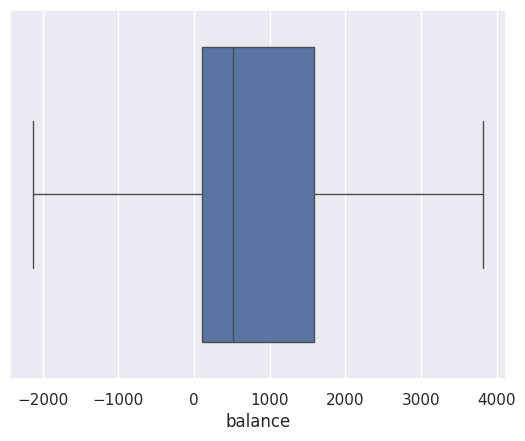

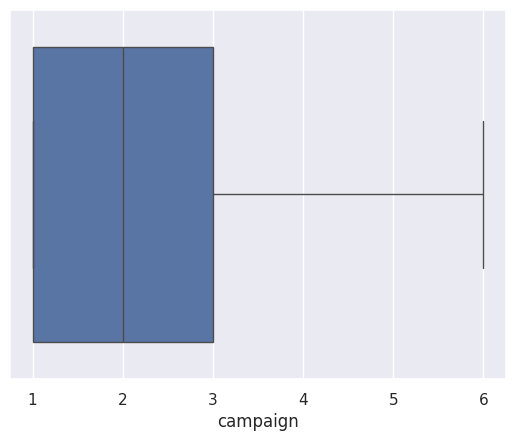

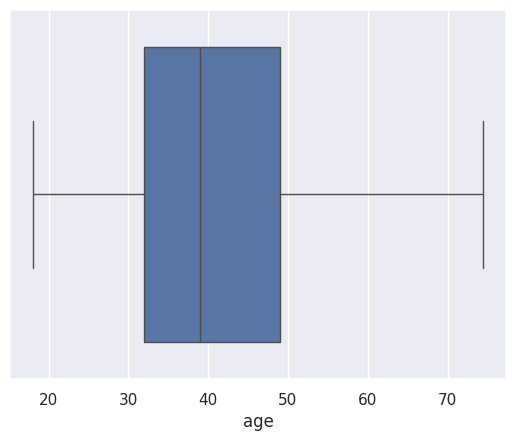

In [97]:
for i in data[['balance','campaign', 'age']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [66]:
data['job'].value_counts()

management       2858
blue-collar      2571
technician       2141
admin.           1464
services         1043
retired           770
self-employed     454
unemployed        414
entrepreneur      383
student           358
housemaid         334
unknown            80
Name: job, dtype: int64

In [98]:
data = pd.get_dummies(data, drop_first=True)

data

,ID,age,balance,day,campaign,result,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,response_other,response_success,response_unknown
0,13829,29.0,3826.375,11,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,22677,26.0,512.000,5,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,10541,30.0,135.000,14,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,13689,41.0,30.000,10,1.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,11304,27.0,321.000,2,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47.0,1167.000,30,1.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12866,17259,31.0,111.000,21,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12867,15200,37.0,1316.000,18,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
12868,13775,42.0,479.000,28,2.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [99]:
data.isnull().sum()

ID                     0
age                    0
balance                0
day                    0
campaign               0
result                 0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
response_other         0
response_success       0


# Modeling Steps

Model hem default hem de optimized deyerler uzerinden qurulur her ikisi uzre Gini deyerine baxilir.

In [100]:
inputs = data.drop('result',axis=1)
output = data['result']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

In [102]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)

    gini_prob = roc_prob*2-1

    print('Model Performance')

    print('Gini prob is', gini_prob*100)

    return gini_prob

In [122]:
first_model = RandomForestClassifier(random_state = 42)
first_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [123]:
first_model_accuracy = evaluate(first_model,X_test,y_test)

Model Performance
Gini prob is 54.31582374204762


In [ ]:
#OPTIMIZED

In [124]:
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [126]:
first_model_random = RandomizedSearchCV(estimator = first_model, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

first_model_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42)

In [127]:
first_model_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [128]:
optimized_model = first_model_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 55.1865570374108


In [ ]:
y_prob = first_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [ ]:
y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [129]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]


    optimized_model.fit(X_train_single_var, y_train)

    y_pred_train_single_var = optimized_model.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1


    y_pred_test_single_var = optimized_model.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train Gini,Test Gini
39,response_unknown,0.1988,0.2262
25,contact_unknown,0.2128,0.2105
22,housing_yes,0.2121,0.2026
3,day,0.1909,0.1801
38,response_success,0.1623,0.1787
1,age,0.2238,0.1657
2,balance,0.6375,0.1555
33,month_may,0.1528,0.1506
4,campaign,0.1456,0.1445
17,marital_single,0.0861,0.0910


In [130]:
inputs = data[['response_unknown','contact_unknown','housing_yes','day','response_success','age',
              'month_may', 'campaign', 'marital_single', 'marital_married']]
output = data['result']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.3, random_state = 42)

In [132]:
first_model_random.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   random_state=42)

In [134]:
optimized_model = first_model_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 50.24059442399409


# Deployment

modelin oyrendiyi deyishenler uzerinden test_data uchun probability of interest hesablanir

In [161]:
test_data = pd.read_excel(r'marketing_test.xlsx')
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,-1,0,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,-1,0,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,-1,0,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,-1,0,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,182,4,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,-1,0,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,-1,0,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,-1,0,unknown


In [163]:
test_data = test_data[['ID', 'age', 'campaign','day','month', 'marital', 'housing', 'contact', 'response']]

In [164]:
test_data = pd.get_dummies(test_data, drop_first=True)

In [165]:
test_data = test_data[['ID','response_unknown', 'contact_unknown', 'housing_yes', 'day',
       'response_success', 'age', 'month_may', 'campaign', 'marital_single', 'marital_married']]

In [166]:
test_data['prob_interest'] = optimized_model.predict_proba(test_data.iloc[:,1:])[:,1]

In [167]:
test_data

,ID,response_unknown,contact_unknown,housing_yes,day,response_success,age,month_may,campaign,marital_single,marital_married,prob_interest
0,812,1,0,1,18,0,25,1,1,1,0,0.6423
1,71,1,1,0,23,0,40,0,1,1,0,0.8243
2,912,1,0,1,16,0,27,0,1,0,0,0.5487
3,43,1,0,1,21,0,30,0,1,1,0,0.6431
4,431,1,0,1,18,0,36,1,2,0,1,0.8184
...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,0,0,1,12,1,43,0,2,0,1,0.1152
853,409,1,0,0,19,0,56,0,4,0,1,0.8322
854,105,1,1,1,3,0,54,0,3,0,1,0.9365
855,810,1,0,0,5,0,30,0,1,1,0,0.5364
